<a href="https://colab.research.google.com/github/divya43-gude/customer_segmentation_-K-Means-/blob/main/customer_segmentation_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
pd.set_option('display.max_rows', None)
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


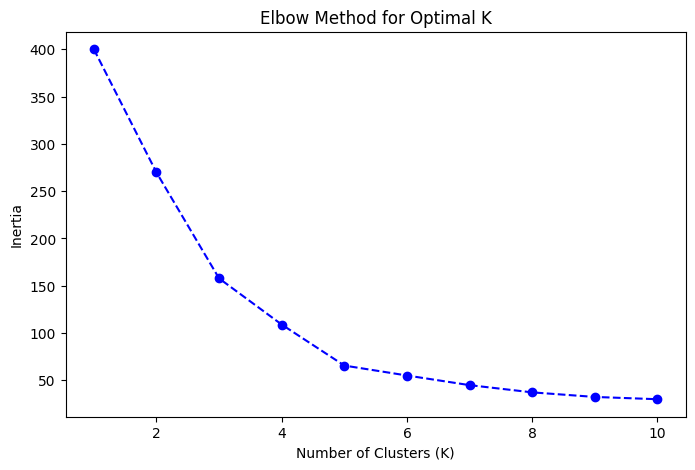

<ipython-input-10-a17ca2999dcc>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(scaled_data)


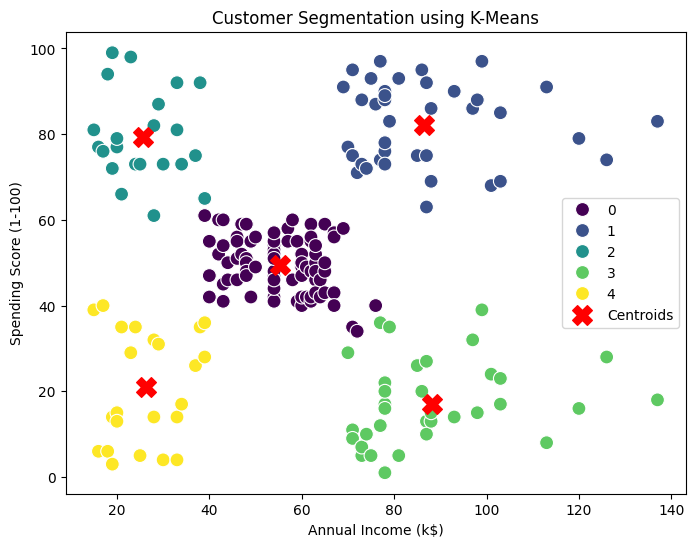

In [ ]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.scatter(centers[:, 0], centers[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()
